
MÁSTER BIG DATA & DATA ENGINEERING

Programación avanzada en Python

Autores: Luis Llana Díaz & Yolanda García Ruiz



# Trabajo final

## Nota Preliminar

Antes de desarrollar el proyecto, es aconsejable leer el enunciado completamente, incluyendo las instrucciones de entrega y otros consejos que se  recogen al final de este enunciado.
En este enunciado se pueden producir cambios durante su desarrollo por distintos motivos: porque se descubre una situación anómala que no ha sido prevista al preparar el enunciado, porque algún estudiante encuentre un error o ambigüedad en la descripción o en los datos de partida o por cualquier otra causa. Esto ocurre también en cualquier proyecto real, así que tomárselo con el mejor talante y aprender también de estas eventuales contingencias. Se procurará informar debidamente del mejor modo posible cuando esto se produzca.


## Introducción

En el portal de datos abiertos de la EMT de Madrid se puede encontrar abundante información sobre transporte y movilidad de la ciudad. En particular los datos relativos a la utilización del servicio de bicicletas eléctricas del ayuntamiento de Madrid.
La dirección del portal mencionado es la siguiente:

https://opendata.emtmadrid.es/Home

y el enlace donde se encuentran los datos relativos a BiciMAD es el siguiente:

https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)

En esta página podemos encontrar los datos de uso de BiciMAD por meses desde abril de 2019 hasta el mes Febrero de 2023. Se trata de un conjunto de URLs a ficheros comprimidos ZIP, donde una vez descomprimidos, podemos encontrar un fichero en formato `csv`.
En esta práctica __solo nos va a interesar los datos de uso desde junio el 2021__. Son ficheros con nombre:

`
trips_YY_MM_monthName.csv
`

donde `YY` representa el año, `MM` representa el mes y `monthName` representa el nombre del mes en inglés.

Los datos del mes 10 del año 2021 está mal generado por la EMT, por lo que se pide que no se use ese fichero.

### Metadatos

En cada uno de los ficheros `csv` podemos encontrar los siguientes datos:

* `date` (Fecha): La fecha en la que tuvo lugar el viaje.
* `idbike` (ID de Bicicleta): El identificador único de la bicicleta utilizada para el viaje.
* `fleet` (Flota): La flota a la que pertenece la bicicleta utilizada.
* `trip_minutes` (Duración del Viaje en Minutos): La duración del viaje en minutos.
* `geolocation_unlock` (Geolocalización de Desbloqueo): Las coordenadas geográficas del lugar de inicio del viaje.
* `address_unlock` (Dirección de Desbloqueo): La dirección postal en la que se desbloqueó la bicicleta.
* `unlock_date` (Fecha y Hora de Desbloqueo): La fecha y hora exactas en las que comenzó el viaje.
* `locktype` (Tipo de Bloqueo): El estado de la bicicleta antes del viaje. Puede estar anclada en una estación o simplemente bloqueada en cualquier lugar libremente.
* `unlocktype` (Tipo de Desbloqueo): El estado de la bicicleta después del viaje.
* `geolocation_lock` (Geolocalización de Bloqueo): Las coordenadas geográficas del lugar final del viaje.
* `address_lock` (Dirección de Bloqueo): La dirección postal en la que se bloqueó la bicicleta.
* `lock_date` (Fecha y Hora de Bloqueo): La fecha y hora exactas en las que finalizó el viaje.
* `station_unlock` (Número de Estación de Desbloqueo): El número de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
* `dock_unlock` (Muelle de Desbloqueo): El muelle de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
*  `unlock_station_name` (Nombre de la Estación de Desbloqueo): El nombre de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
* `station_lock` (Número de Estación de Bloqueo): El número de la estación en la que la bicicleta estaba anclada después del viaje, si la había.
* `dock_lock` (Muelle de Bloqueo): El muelle de la estación en la que la bicicleta estaba anclada después del viaje, si la había.
* `lock_station_name` (Nombre de la Estación de Bloqueo): El nombre de la estación en la que la bicicleta estaba anclada después del viaje, si la había.

## Librerías

Importar todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.

In [32]:
import matplotlib.pyplot as plt

from UrlEMT.UrlEMT import UrlEMT
from BiciMad.BiciMad import BiciMad

## ETAPA 1. Análisis exploratorio y consultas.



### La descarga de los ficheros

En este notebook vamos a estudiar únicamente los datos de febrero de 2023.
La URL que permite descargar dichos datos es la siguiente:

In [2]:
url = "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx"

Observa que en la URL aparece la cadena `trips_23_02`, y que el fichero ZIP tiene un archivo de datos en formato csv llamado `trips_23_02_February.csv`.


__Se pide:__
 Escribir una función llamada `csv_from_zip` que reciba como único argumento un string que represente la URL al fichero ZIP de datos de uso y devuelva un fichero en formato CSV. El tipo del objeto devuelto es `TextIO`. La función  lanzará una excepción de tipo `ConnectionError` en caso de que falle la petición al servidor de la EMT.

__Observaciones:__
En el notebook `05_ficheros` del módulo de `Secuencias` se habla del manejo de ficheros en formato ZIP, y de cómo leer un fichero, transformarlo en una cadena de caracteres para posteriormente, usando el método `String.IO`, obtener un fichero de texto.
Deberás importar el módulo `typing`.

In [33]:
url_object = UrlEMT()
csv_file = url_object.get_csv(2,23)
csv_file

### Creación del dataframe de datos

__Se pide:__
Crear una función llamada `get_data` que reciba como único argumento un fichero csv y que devuelva un objeto de tipo DataFrame con las siguientes restricciones:
* El índice del dataframe debe ser a fecha en la que tuvo lugar el viaje (usa el argumento `index_col`).
* Todas las fechas que aparecen en los datos ha de tener tipo `datetime` (usa el argumento 'parse_dates`).
* De todas las columnas que hay en el fichero, solo nos interesan las siguientes:

   ```
     [ 'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype',
     'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock', 'unlock_station_name',
     'station_lock', 'lock_station_name']
   ```

por lo que el dataframe ha de tener solo dichas columnas.

__Observaciones:__ Observa que los datos de usos que publica la EMT son fichero CSV donde el separador de campos es el símbolo `;`.

In [6]:
bicimad_object = BiciMad(2, 23)
bicimad_object.data

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2023-02-01,7337.0,1.0,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',2023-02-01 00:00:10,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01 00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2023-02-01,5098.0,1.0,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01 00:00:25,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01 00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-18,6473.0,1.0,0.47,"{'type': 'Point', 'coordinates': [-3.6726019, ...",'Calle Doctor Esquerdo nº 191',2023-02-18 04:39:38,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6726019, ...",'Calle Doctor Esquerdo nº 191',2023-02-18 04:40:06,89.0,84 - Valderribas,89.0,84 - Valderribas
NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2023-02-18,5252.0,1.0,7.43,"{'type': 'Point', 'coordinates': [-3.690358964...",'Calle Sodio nº 1B',2023-02-18 04:42:50,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7064516, ...",'Paseo de la Esperanza nº 2',2023-02-18 04:50:16,243.0,235 - Embajadores 191,134.0,163 - Paseo de la Esperanza


### Explorar la estructura de los datos en el dataframe

El método `info` devuelve información acerca de la estructura de un dataframe.

__Se pide:__
Escribe el código necesario para crear un dataframe llamado `usos` a partir de la url "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx".
Ejecuta el método `info()` sobre el dataframe y comenta los resultados.
Fíjate en las columnas que representan fechas y comprueba su tipo de datos. ¿Cuántas filas se han cargado?. Fíjate en los valores distintos de `NaN` en cada una de las columnas.

In [7]:
# Solución
bicimad_object.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336988 entries, NaT to 2023-02-18
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  float64       
 1   fleet                168494 non-null  float64       
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   unlock_date          168494 non-null  datetime64[ns]
 6   locktype             168494 non-null  object        
 7   unlocktype           168494 non-null  object        
 8   geolocation_lock     168494 non-null  object        
 9   address_lock         168494 non-null  object        
 10  lock_date            168494 non-null  datetime64[ns]
 11  station_unlock       168114 non-null  float64       
 12  unlock_station_name  168114 non-null  object        
 13  stati

#### Resultados
Se han cargado 336,988 filas con las siguientes características: 5 variables son de tipo float, mientras que 3 (incluyendo el índice) son de tipo datetime. El resto de las variables están en formato object. Las primeras 11 variables contienen la misma cantidad de valores no nulos, mientras que las últimas 4 presentan discrepancias en los valores no nulos. Esto parece deberse a que en los datos hay dos tipos de bicicletas. Uno de estos tipos permite al usuario dejar la bicicleta en lugares que no son estaciones oficiales, lo que también habilita la posibilidad de desbloquearlas en lugares no convencionales. Por lo tanto, en estos casos, no se dispondría de registros para las estaciones de bloqueo y desbloqueo. También podemos deducir que hay múltiples filas cuyos valores para todas las variabes es `NaN`, porque en ningún caso hay 336,988 no nulos.

### Borrado de valores NaN.

El método  `dropna` de los DataFrames tiene un argumento `how` que permite indicar que se borren filas o columnas donde todos los valores son `NaN`.

__Se pide:__ Crear una función llamada `delete_nan_rows` que borre las filas con todos sus valores `NaN` de un dataframe recibido como argumento. La función modifica el dataframe y no devuelve nada.  

Comenta los resultados. Prueba la función `delete_nan_rows` con el dataframe `usos`. Comprueba que el número de filas del dataframe `usos` ha cambiado. Puedes volver a ejecutar el método `info` y compáralo con el resultado antes de invocar a la función `delete_nan_rows`.

In [8]:
bicimad_object.delete_nan_rows()
bicimad_object.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168494 entries, 2023-02-01 to 2023-02-18
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  float64       
 1   fleet                168494 non-null  float64       
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   unlock_date          168494 non-null  datetime64[ns]
 6   locktype             168494 non-null  object        
 7   unlocktype           168494 non-null  object        
 8   geolocation_lock     168494 non-null  object        
 9   address_lock         168494 non-null  object        
 10  lock_date            168494 non-null  datetime64[ns]
 11  station_unlock       168114 non-null  float64       
 12  unlock_station_name  168114 non-null  object        
 13

#### Resultados
Efectivamente habían muchas filas con todos sus valores nulos, la mitad del total de filas cargadas fueron eliminadas, lo que nos indica que la mitad de los registros inicialmente cargados no nos estaban dando ninguna información.

###  Exploración de las columnas.

La columna `fleet` representa el tipo de flota de bicicleta eléctrica.
Las BiciMAD Go son free floating y se corresponden con tipo de flota 2. A diferencia de las BiciMAD normales, no tienen por qué dejarse en una estación de bicicletas, aunque existe la posibilidad de hacerlo. Su bloqueo se realiza por medio de un candado manual, aspecto en el que se diferencian de las otras bicis municipales.

Por otro lado, las columnas `locktype` y `unlocktype` tienen información del tipo de bloqueo y desbloqueo respectivamente.

__Se pide:__
* ¿Cuántos valores distintos hay en la columna `fleet` del dataframe `usos`?
* ¿Cuántos valores distintos hay en las columnas `locktype` y `unlocktype` del dataframe `usos`?

In [9]:
# Sol
bicimad_object.data["fleet"].value_counts()

fleet
1.0    167692
2.0       802
Name: count, dtype: int64

In [10]:
bicimad_object.data["locktype"].value_counts()

locktype
STATION    168018
FREE          476
Name: count, dtype: int64

In [11]:
bicimad_object.data["unlocktype"].value_counts()

unlocktype
STATION    168114
FREE          380
Name: count, dtype: int64

### Cambio de tipo de datos

Las columnas  `idBike` y `fleet`  tienen tipo float, pero en realidad representan un identificador de bicicleta y de flota respectivamente.

__Se pide:__ Crear una función llamada `float_to_str` que cambie el tipo de una columna a tipo string. La función recibe como argumentos un dataframe y el nombre de una columna. La función no devuelve nada.
Si la columna no se encuentra entre las columnas del dataframe, la función no hace nada.

__Observaciones:__ Puedes usar la función `map` para aplicar la función de transformación.

Prueba la función con el datafame `usos` y  las columnas `idBike` y `fleet`.
De esta forma, el identificador de bicicleta `7337.0` pasará a ser `'7337'`. Ejecuta la función `info` sobre el dataframe `usos` para comprobar que los tipos asociados a esas columnas han cambiado.

In [12]:
for col in ["fleet", "idBike", "station_lock", "station_unlock"]:
    bicimad_object.float_to_str(col)
bicimad_object.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168494 entries, 2023-02-01 to 2023-02-18
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  object        
 1   fleet                168494 non-null  object        
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   unlock_date          168494 non-null  datetime64[ns]
 6   locktype             168494 non-null  object        
 7   unlocktype           168494 non-null  object        
 8   geolocation_lock     168494 non-null  object        
 9   address_lock         168494 non-null  object        
 10  lock_date            168494 non-null  datetime64[ns]
 11  station_unlock       168494 non-null  object        
 12  unlock_station_name  168114 non-null  object        
 13

## Consultas

Las siguientes consultas se realizarán con el dataframe `usos` creado en los apartados anteriores.

### C1

¿Cuántas bicicletas han sido desbloqueadas de una estación y no se bloquean en ninguna?

In [14]:
bicimad_object.data[(bicimad_object.data["unlocktype"]=="STATION") & (bicimad_object.data["locktype"]=="FREE")].shape[0]

168

### C2

Seleccionar solo las bicicletas del tipo de flota '1' . El nuevo dataframe se ha de llamar `regular_fleet`.

In [15]:
# Sol
regular_fleet = bicimad_object.data[bicimad_object.data["fleet"]=="1"]
regular_fleet.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
fecha,,,,,,,,,,,,,,,
2023-02-01,7337,1,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",Calle Jesús nº 1,2023-02-01 00:00:10,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",Plaza de la Cebada nº 16,2023-02-01 00:05:41,31,27 - Huertas,43,39 - Plaza de la Cebada
2023-02-01,5098,1,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",Glorieta de Embajadores nº 2,2023-02-01 00:00:25,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",Glorieta de Embajadores nº 2,2023-02-01 00:00:44,52,48 - Embajadores 2,52,48 - Embajadores 2
2023-02-01,6519,1,0.27,"{'type': 'Point', 'coordinates': [-3.6894193, ...",Calle Antonio Maura nº 15,2023-02-01 00:00:36,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",Calle Antonio Maura nº 15,2023-02-01 00:00:52,69,65 - Antonio Maura,69,65 - Antonio Maura
2023-02-01,2551,1,8.58,"{'type': 'Point', 'coordinates': [-3.7022591, ...",Glorieta de Embajadores nº 2,2023-02-01 00:00:53,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6991147, ...",Calle Atocha nº 54,2023-02-01 00:09:28,52,48 - Embajadores 2,45,41 - Antón Martín
2023-02-01,6519,1,0.20,"{'type': 'Point', 'coordinates': [-3.6894193, ...",Calle Antonio Maura nº 15,2023-02-01 00:00:57,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",Calle Antonio Maura nº 15,2023-02-01 00:01:09,69,65 - Antonio Maura,69,65 - Antonio Maura


### C3

Crea una función llamada `day_time` para calcular las horas totales de uso de bicicletas por día del mes.
La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de horas.

Prueba la función anterior con el dataframe  `usos`.

__Opcional:__ Dibuja un diagrama de barras con el resultado de la función `day_time` sobre el dataframe `usos`. Utiliza el módulo `matplotlib.pyplot`.

In [16]:
h_per_day = bicimad_object.day_time()
h_per_day

2023-02-01    4160.538500
2023-02-02    3435.122333
2023-02-03    3456.311667
2023-02-04    3640.818667
2023-02-05    3263.938167
2023-02-06    3372.989167
2023-02-07    2874.889500
2023-02-08    3446.484000
2023-02-09    3514.816500
2023-02-10    3596.700667
2023-02-11    2977.282500
2023-02-12    3003.624000
2023-02-13    3121.499333
2023-02-14    2751.551167
2023-02-15    2742.637167
2023-02-16    2462.706500
2023-02-17    1905.261667
2023-02-18     162.928500
Name: total_hours, dtype: float64

Text(0, 0.5, 'Hours')

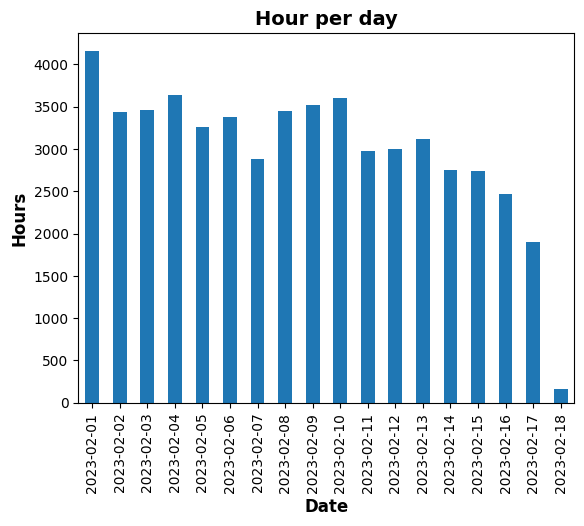

In [17]:
h_per_day.plot(kind="bar")
plt.title("Hour per day", fontweight='bold', fontsize=14)  # Title
plt.xlabel("Date", fontweight='bold', fontsize=12)     # X-axis label
plt.ylabel("Hours", fontweight='bold', fontsize=12)  

### C4

Crea una función llamada `weekday_time` para calcular las horas totales de uso de bicicletas por día de la semana. La función recibe un dataframe y devuelve una Serie donde el índice es el día de la semana (L, M, X, J, V, S, D) y el valor es el número de horas.

Prueba la función anterior con el dataframe usos.



In [18]:
w_hours = bicimad_object.weekday_time()
w_hours

weekday
D     6267.562167
J     9412.645333
L     6494.488500
M     5626.440667
S     6781.029667
V     8958.274000
X    10349.659667
Name: total_hours, dtype: float64

### C5

Crea una función llamada `total_usage_day` para calcular el número total de usos de bicicletas por día del mes. La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de usos.

Prueba la función anterior con el dataframe usos.



In [19]:
tot_usage = bicimad_object.total_usage_day()
tot_usage

fecha
2023-02-01    11442
2023-02-02    11069
2023-02-03    10166
2023-02-04     8903
2023-02-05     8026
2023-02-06    10118
2023-02-07     8986
2023-02-08    10576
2023-02-09    10814
2023-02-10    10579
2023-02-11     8383
2023-02-12     7801
2023-02-13     9802
2023-02-14    10341
2023-02-15    10766
2023-02-16     9684
2023-02-17    10067
2023-02-18      971
Name: total_usage, dtype: int64

### C6

Calcular el total de usos por fecha y estación de desbloqueo. Como la fecha está en el índice y la estación de desbloqueo es una columna, lo mejor es agrupar por la columna `station_unlock` y  un objeto `Grouper` de frecuencia diaria (1D).

A continuación, se muestra un ejemplo del funcionamiento de la función Grouper de pandas:
```
>>> df
             ID  Price
2000-01-02   0     10
2000-01-02   1     20
2000-01-09   2     30
2000-01-16   3     40

# Grouper con frecuencia semanal (1W)
>>> df.groupby(pd.Grouper(freq="1W")).mean()
               ID  Price

2000-01-02    0.5   15.0
2000-01-09    2.0   30.0
2000-01-16    3.0   40.0
```

In [20]:
bicimad_object.usage_by_date_and_unlock_st()

amount
fecha      station_unlock        
2023-02-01 1                   31
           10                  33
           100                 31
           101                 23
           102                 57
...                           ...
2023-02-18 95                   3
           96                   1
           97                   2
           99                   1
           nan                  2

[4581 rows x 1 columns]

### C7

Se quiere averiguar la dirección de las estaciones de desbloqueo que a lo largo del mes han tenido un mayor número de viajes. Crear una función llamada `most_popular_stations` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un conjunto con la dirección de las estaciones.



In [24]:
most_popular = bicimad_object.info_most_popular_stations()
most_popular

,station_unlock,address_unlock,amount,st_info
0,43,Plaza de la Cebada nº 16,2189,"station: 43, dir: Plaza de la Cebada nº 16"


In [25]:
most_popular["st_info"]

0    station: 43, dir: Plaza de la Cebada nº 16
Name: st_info, dtype: object

### C8

Se quiere averiguar el  número de usos de las estaciones de desbloqueo que a lo largo del mes ha tenido un mayor número de viajes. Crear una función llamada `usage_from_most_popular_station` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un entero.

In [26]:
most_popular["amount"]

0    2189
Name: amount, dtype: int64

In [27]:
# Resumen para estaciones de bloqueo:
bicimad_object.resume()

total_uses                                                      168494
total_time                                                   3233406.0
most_popular_station      [station: 43, dir: Plaza de la Cebada nº 16]
uses_from_most_popular                                          [2245]
dtype: object

In [28]:
# Resumen para estaciones de desbloqueo:
bicimad_object.resume(True)

total_uses                                                      168494
total_time                                                   3233406.0
most_popular_station      [station: 43, dir: Plaza de la Cebada nº 16]
uses_from_most_popular                                          [2189]
dtype: object

# ETAPA 2: Construcción del módulo bicimad

En esta sección se proporcionan algunas instrucciones para la creación del módulo `bicimad`.
La gran mayoría de métodos y funciones pedidas aquí, se han implementado de alguna manera en la sección anterior, por lo que la construcción del módulo y las clases que se pide a continuación es en gran medida una reorganización de código. El módulo `bicimad` debe exportar las clases `UrlEMT` y `BiciMad` descritas a continuación.



## Clase `UrlEMT`

Vamos a crear una clase que permita recopilar todos los enlaces que hay en la web de la EMT (https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)), que se corresponden con datos de uso de bicicletas desde Junio de 2021. Los enlaces que cumplen esta restricción son los que denominaremos a partir de ahora _enlaces válidos_. Estos enlaces contienen la cadena `trips_YY_MM_monthName.csv` donde `YY` representa el año, `MM` representa el mes y `monthName` representa el nombre del mes en inglés.


__Requisitos:__

* La clase ha de contener dos constantes de clase:
```
EMT = 'https://opendata.emtmadrid.es/'
GENERAL = "/Datos-estaticos/Datos-generales-(1)"
```

* Los objetos de la clase tienen un único atributo privado que representa el conjunto enlaces válidos que se encuentran en el sitio web de la EMT.

* Ha de contener al menos los siguientes métodos:

    * `__init__`: método constructor sin argumentos.
    * `select_valid_urls`: método estático que se encarga de actualizar el atributo de los objetos de la clase. Devuelve un conjunto de enlaces válidos. Si la petición al servidor de la EMT devuelve un código de retorno distinto de 200, la función lanza una excepción de tipo `ConnectionError`.
    
    * Para extraer los enlaces hay que definir una funcion `get_links` que tome como parámetros un texto HTML y devuelva un conjunto con todos los enlaces.
    Esta función debe usar expresiones regulares para encontrar los enlaces.

    * `get_url`: método de instancia que acepta los argumentos de tipo entero `month` y `year` y devuelve el string de la URL correspondiente al mes `month` y año `year`.  Si no existe un enlace válido correspondiente al mes `month` y año `year`, se lanzará una excepción de tipo `ValueError`. Se deberá comprobar que el mes y año se corresponden con valores válidos (`month` entre 1 y 12, `year` entre 21 y 23).

    * `get_csv`: método de instancia que acepta los argumentos de tipo entero `month` y `year` y devuelve  un fichero en formato CSV correspondiente al mes `month` y año `year`.
     El tipo del objeto devuelto es TextIO. La función lanzará una excepción de tipo `ConnectionError` en caso de que falle la petición al servidor de la EMT. En este caso, se podrá aprovechar el código de la función `csv_from_ZIP` implementada en la sección anterior.



In [29]:
url_object.valid_urls

{'23_02': 'https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx',
 '23_01': 'https://opendata.emtmadrid.es/getattachment/20b8509b-97a8-4831-b9d2-4900322e1714/trips_23_01_January-csv.aspx',
 '22_12': 'https://opendata.emtmadrid.es/getattachment/34b933e4-4756-4fed-8d5b-2d44f7503ccc/trips_22_12_December-csv.aspx',
 '22_11': 'https://opendata.emtmadrid.es/getattachment/45f51cef-9296-4afe-b42e-d8d5bca3c548/trips_22_11_November-csv.aspx',
 '22_10': 'https://opendata.emtmadrid.es/getattachment/7c0b2ce4-520d-4dc1-b29b-c5fa8e798e81/trips_22_10_October-csv.aspx',
 '22_09': 'https://opendata.emtmadrid.es/getattachment/8d9ed4a4-6770-4307-92f8-6e34b6006eea/trips_22_09_September-csv.aspx',
 '22_08': 'https://opendata.emtmadrid.es/getattachment/359c458b-1425-4fe9-b2fb-1e2f6d9cd40e/trips_22_08_August-csv.aspx',
 '22_07': 'https://opendata.emtmadrid.es/getattachment/cfad5ecf-b5ca-44da-8be3-1983e46646e9/trips_22_07_July-csv.aspx',
 '22_06': 'http


## Clase `BiciMad`

Vamos a crear una clase que represente los datos de uso de las bicicletas eléctricas en un mes concreto, junto con las operaciones necesarias para realizar la limpieza y el análisis básico que hemos realizado anteriormente.

__Requisitos:__

* Los objetos de la clase tienen  tres atributos privados que representan el mes, el año y los datos de uso extraídos de un fichero csv y representados mediante un dataframe de pandas.

* Ha de contener al menos los siguientes métodos:

    * `__init__`: método constructor. Acepta los argumentos de tipo entero `month` y `year`. El atributo que representa los datos, se actualiza al construir el objeto mediante el método estático `get_data`.
    * `get_data`: método estático que acepta los argumentos de tipo entero `month` y `year` y devuelve un objeto de tipo DataFrame con los datos de uso correspondientes al mes `month` y año  `year`. El índice del dataframe debe ser la fecha en la que tuvo lugar el viaje. Todas las fechas que aparecen en los datos ha de tener tipo `datetime`.  Las únicas columnas que tiene que tener el DataFrames son:

    ```
    [ 'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype', 'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock',
    'unlock_station_name', 'station_lock', 'lock_station_name']
    ```
    * `data`: método decorado con el decorador `@property` para acceder al atributo que representa los datos de uso. El atributo ha de llamarse igual.
    * `__str__`: método especial que permite la representación informal del objeto. Su comportamiento es idéntico al método `__str__` de los objetos de la clase DataFrame.
    * `clean`: método de instancia que se encarga de realizar la limpieza  y transformación del dataframe que representa los datos. Modifica el dataframe y no devuelve nada. Realiza las siguientes tareas:
        * Borrado de valores NaN. Borrar las filas con todos sus valores NaN.
        * Cambiar el tipo de datos de las siguientes columnas del dataframe: `fleet`, `idBike`, `station_lock`, `station_unlock`. Dichas columnas han de ser de tipo `str`.
        
    En este caso, podrás aprovechar el código ya implementado en la sección anterior.
    * `resume`: método de instancia que devuelve un objeto de tipo Series con las siguientes restricciones:
        * el índice está formado con las etiquetas:
            'year', 'month',                                 'total_uses', 'total_time', 'most_popular_station', 'uses_from_most_popular'
        * los valores son: el año, el mes, el total de usos en dicho mes, el total de horas en dicho mes, el conjunto de estaciones de bloqueo con mayor número de usos y el número de usos de dichas estaciones.

    En este caso podrás aprovechar el código de las funciones implementadas en la sección de consultas.


## Tests

Define los tests que creas necesarios para comprobar que las clases funcionan correctamente. Los tests deberán estar en un directorio independiente, dentro del proyecto, pero no en el paquete que se distribuye.

## Cuaderno de jupyter

Además del proyecto, se deberá incluir un cuaderno jupyter con las consultas de la ETAPA 1. Pero en lugar de utilizar las funciones que se indican en ella, deberá usar la clase `Bicimad`.

# Entrega
La entrega consistirá en un fichero comprimido `zip` con lo siguiente:
- Fichero `whl` con el instalable del paquete generado
- Los ficheros del paquete desarrollado, incluyendo los tests.
- El cuaderno de jupyter con las consultas C1-C8 de la Etapa 1, usando la clase `BiciMad`

# Criterios de la corrección
Horas previstas para la realización de la práctica 15 horas.

- Correcto funcionamiento de las clases 40%
- Buena elección de tests para comprobar las clases 20%
- Correcta generación del paquete `whl` 10%
- Correcta documentación de las clases, métodos y funciones 10%
- Cuaderno jupyter 10%

------------------